# Preprocess

In [1]:
import pickle
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [2]:
# Loading X_geo
with open('./PCA_model_params/X_geo.pkl', 'rb') as file:
    X_geo = pickle.load(file)

# Loading X_vars
with open('./PCA_model_params/X_vars.pkl', 'rb') as file:
    X_vars = pickle.load(file)

In [17]:
X_geo

,tract,GEO_ID,NAME_x,state,county,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,counts
0,31328,1400000US48085031328,"Census Tract 313.28, Collin County, Texas",48,85,48,085,31328,48085031328,313.28,Census Tract 313.28,G5020,S,1695183,0,+33.0262356,-096.6180126,"POLYGON ((-96.62425 33.02574, -96.62396 33.027...",0
1,113403,1400000US48439113403,"Census Tract 1134.03, Tarrant County, Texas",48,439,48,439,113403,48439113403,1134.03,Census Tract 1134.03,G5020,S,2373230,0,+32.8301159,-097.1944966,"POLYGON ((-97.20534 32.82399, -97.20533 32.824...",1
2,16415,1400000US48113016415,"Census Tract 164.15, Dallas County, Texas",48,113,48,113,16415,48113016415,164.15,Census Tract 164.15,G5020,S,3411526,1013872,+32.6599415,-097.0092593,"POLYGON ((-97.01538 32.66698, -97.01523 32.666...",0
3,113936,1400000US48439113936,"Census Tract 1139.36, Tarrant County, Texas",48,439,48,439,113936,48439113936,1139.36,Census Tract 1139.36,G5020,S,2738111,0,+32.9066845,-097.2972495,"POLYGON ((-97.30730 32.91224, -97.30725 32.912...",0
4,17201,1400000US48113017201,"Census Tract 172.01, Dallas County, Texas",48,113,48,113,17201,48113017201,172.01,Census Tract 172.01,G5020,S,5833533,15581,+32.7246272,-096.6251422,"POLYGON ((-96.63137 32.70029, -96.63135 32.702...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,10601,1400000US48113010601,"Census Tract 106.01, Dallas County, Texas",48,113,48,113,10601,48113010601,106.01,Census Tract 106.01,G5020,S,6861821,8964,+32.7874552,-096.8979923,"POLYGON ((-96.92630 32.77888, -96.92627 32.778...",0
1714,21630,1400000US48121021630,"Census Tract 216.30, Denton County, Texas",48,121,48,121,21630,48121021630,216.30,Census Tract 216.30,G5020,S,1998375,0,+33.0214643,-096.9079607,"POLYGON ((-96.91742 33.02694, -96.91720 33.027...",1
1715,110806,1400000US48439110806,"Census Tract 1108.06, Tarrant County, Texas",48,439,48,439,110806,48439110806,1108.06,Census Tract 1108.06,G5020,S,12277432,25796,+32.7544553,-097.5215104,"POLYGON ((-97.54845 32.75563, -97.54820 32.774...",0
1716,16708,1400000US48113016708,"Census Tract 167.08, Dallas County, Texas",48,113,48,113,16708,48113016708,167.08,Census Tract 167.08,G5020,S,3466263,2080,+32.6246293,-096.7934756,"POLYGON ((-96.80578 32.62437, -96.80576 32.625...",0


In [18]:
X_vars

,B05001_002E,B05003_014E,B08006_015E,B08006_032E,B08122_017E,B08122_020E,B08124_029E,B08124_030E,B08126_041E,B08126_061E,...,B08303_003E,B11001_007E,B11001_008E,B11001_009E,B25132_004E,B25132_005E,B25132_009E,B25133_002E,B28011_003E,B15003_025E
0,2787,476,0,0,0,0,0,0,0,0,...,79,65,65,0,0,281,353,62,0,15
1,2472,371,0,0,0,0,0,0,50,0,...,74,253,163,90,24,230,206,176,0,40
2,3846,649,0,0,0,0,0,0,33,0,...,13,187,122,65,38,134,411,106,0,66
3,4742,549,0,0,0,0,0,0,0,0,...,116,670,381,289,50,333,359,402,0,86
4,3838,955,0,0,0,0,0,0,54,0,...,122,579,464,115,35,281,165,1063,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,3306,963,28,28,28,28,28,0,49,28,...,9,313,210,103,87,119,426,561,0,0
1714,4291,425,10,10,10,0,10,10,12,10,...,146,446,284,162,30,494,283,759,0,25
1715,4775,774,0,0,0,0,0,0,53,0,...,61,540,479,61,79,392,169,699,0,70
1716,6306,1026,0,0,0,0,0,0,44,0,...,109,277,251,26,18,131,534,1624,0,68


In [4]:
col_index = X_vars.columns.get_loc("B25133_002E")
col_index # gas cost

21

In [5]:
col_index = X_vars.columns.get_loc("B25132_009E")
col_index # electricity cost

20

In [6]:
# monthly gas cost and electricity cos
X_vars.describe().loc[:,["B25133_002E", "B25132_009E"]]

,B25133_002E,B25132_009E
count,1718.000000,1718.000000
mean,878.862049,316.951688
std,563.108539,216.764761
min,0.000000,0.000000
25%,447.250000,155.250000
50%,803.500000,280.000000
75%,1248.500000,431.000000
max,3504.000000,1500.000000


# transformation process

**transform to normalized features**

In [7]:
from sklearn.preprocessing import MinMaxScaler
Mscaler = MinMaxScaler() 
_a =Mscaler.fit_transform(X_vars)
_a

array([[0.21245617, 0.1814716 , 0.        , ..., 0.01769406, 0.        ,
        0.02873563],
       [0.18844336, 0.1414411 , 0.        , ..., 0.05022831, 0.        ,
        0.07662835],
       [0.29318494, 0.24742661, 0.        , ..., 0.03025114, 0.        ,
        0.12643678],
       ...,
       [0.36400366, 0.29508197, 0.        , ..., 0.1994863 , 0.        ,
        0.13409962],
       [0.48071352, 0.39115517, 0.        , ..., 0.46347032, 0.        ,
        0.1302682 ],
       [0.3104894 , 0.45863515, 0.        , ..., 0.28025114, 0.2585034 ,
        0.03256705]])

**transform to PCA features from X_norm**

# testing Env

In [3]:
from tract_env import Tract_Env

In [4]:
agent_id = 0 
tract_env_0 =  Tract_Env(X_vars.iloc[agent_id,:], X_geo.iloc[agent_id,:], X_vars_all = X_vars, X_geo_all = X_geo)

action space <bound method Discrete.sample of Discrete(3)>
inital state value(EVCS cnt, 24 vars):
 [   0 2787  476    0    0    0    0    0    0    0    0    0    0    0
    0   79   65   65    0    0  281  353   62    0   15]
single tract input vars shape: (24,)
single tract geo data shape: (19,)


In [5]:
tract_env_0.observation_space.sample(), tract_env_0.action_space.sample()

(array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 0]),
 1)

# episodes

In [17]:
episodes = 10
for episode in range(episodes):
    state = tract_env_0.reset()
    done = False
    return_ = 0 
    i = 0
    
    while not done:
        i +=1
        #env.render()
        action = tract_env_0.action_space.sample()
        state, reward, done, info = tract_env_0.step(action)
        print("state", state)
        return_ +=reward
        
    average_reward = return_ / i
    print("===================================================================================================================================")
    print(f'Episode:{episode:4d},  terminal_step: {i:5d}, n_chg:{state[0]:<4d}, gas:{state[21]:<5d}, gas:{state[22]:<5d},return:{return_:5.2f}, Average reward: {average_reward :5.2f}')

state [  -1 2787  476    0    0    0    0    0    0    0    0    0    0    0
    0   79   65   65    0    0  281  313  162    0   15]
Episode:   0,  terminal_step:     1, n_chg:-1  , gas:313  , gas:162  ,return:-1.00, Average reward: -1.00
state [   0 2787  476    0    0    0    0    0    0    0    0    0    0    0
    0   79   65   65    0    0  281  353   62    0   15]
state [  -1 2787  476    0    0    0    0    0    0    0    0    0    0    0
    0   79   65   65    0    0  281  313  162    0   15]
Episode:   1,  terminal_step:     2, n_chg:-1  , gas:313  , gas:162  ,return: 0.00, Average reward:  0.00
state [   1 2787  476    0    0    0    0    0    0    0    0    0    0    0
    0   79   65   65    0    0  281  393  -38    0   15]
Episode:   2,  terminal_step:     1, n_chg:1   , gas:393  , gas:-38  ,return: 5.00, Average reward:  5.00
state [  -1 2787  476    0    0    0    0    0    0    0    0    0    0    0
    0   79   65   65    0    0  281  313  162    0   15]
Episode:   3

check dim_state, n_action

In [6]:
tract_env_0.observation_space

Box(0, 1, (25,), int32)

In [7]:
tract_env_0.action_space

Discrete(3)

In [16]:
tract_env_0.action_space.sample()

1

# Train RL model using DQN

In [30]:
!python DQN.py --agent_id 0 --do_train --do_eval --dim_state 25 --num_action 3 --discount 0.95 --max_steps 1000 --lr 0.001 --batch_size 64 --no_cuda  --seed 401 --warmup_steps 100 --output_dir DQN_output --epsilon_decay 0.001 

action space <bound method Discrete.sample of Discrete(3)>
inital state value(EVCS cnt, 24 vars):
 [   0 2787  476    0    0    0    0    0    0    0    0    0    0    0
    0   79   65   65    0    0  281  353   62    0   15]
single tract input vars shape: (24,)
single tract geo data shape: (19,)
number of steps: i=1, reward=0, length=2, max_reward=-inf, loss=0.0e+00, epsilon=1.000
number of steps: i=2, reward=5, length=1, max_reward=0, loss=0.0e+00, epsilon=0.999
number of steps: i=3, reward=-1, length=1, max_reward=5, loss=0.0e+00, epsilon=0.998
number of steps: i=4, reward=-1, length=1, max_reward=5, loss=0.0e+00, epsilon=0.997
number of steps: i=5, reward=-1, length=1, max_reward=5, loss=0.0e+00, epsilon=0.996
number of steps: i=6, reward=5, length=1, max_reward=5, loss=0.0e+00, epsilon=0.995
number of steps: i=7, reward=5, length=1, max_reward=5, loss=0.0e+00, epsilon=0.995
number of steps: i=8, reward=5, length=1, max_reward=5, loss=0.0e+00, epsilon=0.994
number of steps: i=9, r

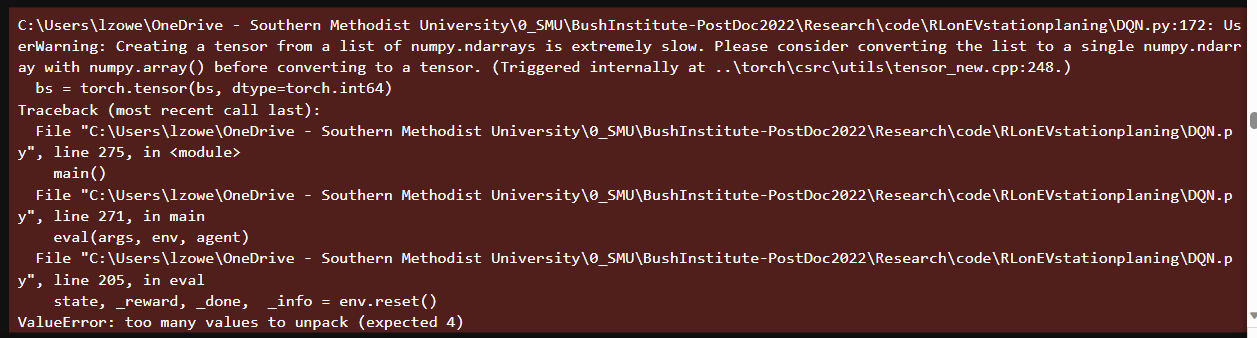

# evaluate model

In [3]:
import torch
from tract_env import Tract_Env
from DQN import DQN, QNet

In [4]:
pwd

'C:\\Users\\lzowe\\OneDrive - Southern Methodist University\\0_SMU\\BushInstitute-PostDoc2022\\Research\\code\\RLonEVstationplaning'

In [4]:
agent = DQN(25, 3)
model_path = '.\DQN_output\model.bin'
agent.Q.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [6]:
agent

In [7]:
X_vars.shape

(1718, 24)

## next actions

In [10]:
# total 1718 tracts
tract_id = 0 
env = Tract_Env(X_vars.iloc[tract_id,:], X_geo.iloc[tract_id,:], X_vars_all = X_vars, X_geo_all = X_geo)
state = env.reset()
action = agent.get_action(torch.from_numpy(state))
print(action.item())

action space <bound method Discrete.sample of Discrete(3)>
inital state value(EVCS cnt, 24 vars):
 [   0 2787  476    0    0    0    0    0    0    0    0    0    0    0
    0   79   65   65    0    0  281  353   62    0   15]
single tract input vars shape: (24,)
single tract geo data shape: (19,)
1


In [19]:
action.item()

1

In [11]:
# creaate a list to collect tract ids and actions
tracts_actions = []

# loop over all the tracts
for i in range(X_vars.shape[0]):
    tract_id = i 
    env = Tract_Env(X_vars.iloc[tract_id,:], X_geo.iloc[tract_id,:], X_vars_all = X_vars, X_geo_all = X_geo)
    state = env.reset()
    action = agent.get_action(torch.from_numpy(state))
    tracts_actions.append(action.item())

len(tracts_actions)

action space <bound method Discrete.sample of Discrete(3)>
inital state value(EVCS cnt, 24 vars):
 [   0 2787  476    0    0    0    0    0    0    0    0    0    0    0
    0   79   65   65    0    0  281  353   62    0   15]
single tract input vars shape: (24,)
single tract geo data shape: (19,)
action space <bound method Discrete.sample of Discrete(3)>
inital state value(EVCS cnt, 24 vars):
 [   1 2472  371    0    0    0    0    0    0   50    0    0    0    0
    0   74  253  163   90   24  230  206  176    0   40]
single tract input vars shape: (24,)
single tract geo data shape: (19,)
action space <bound method Discrete.sample of Discrete(3)>
inital state value(EVCS cnt, 24 vars):
 [   0 3846  649    0    0    0    0    0    0   33    0    0    0    0
    0   13  187  122   65   38  134  411  106    0   66]
single tract input vars shape: (24,)
single tract geo data shape: (19,)
action space <bound method Discrete.sample of Discrete(3)>
inital state value(EVCS cnt, 24 vars):
 [   

AttributeError: 'list' object has no attribute 'shape'

In [12]:
tracts_actions

[1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,


In [15]:
env.action_dict

{0: -1, 1: 0, 2: 1}

### visualize decision

In [38]:
import pandas as pd
import geopandas as gpd
df_dm = pd.DataFrame( {"decision": tracts_actions} )
vis_df = pd.concat([X_geo, X_vars, df_dm], axis = 1)
vis_df = gpd.GeoDataFrame(vis_df, geometry=vis_df.geometry)

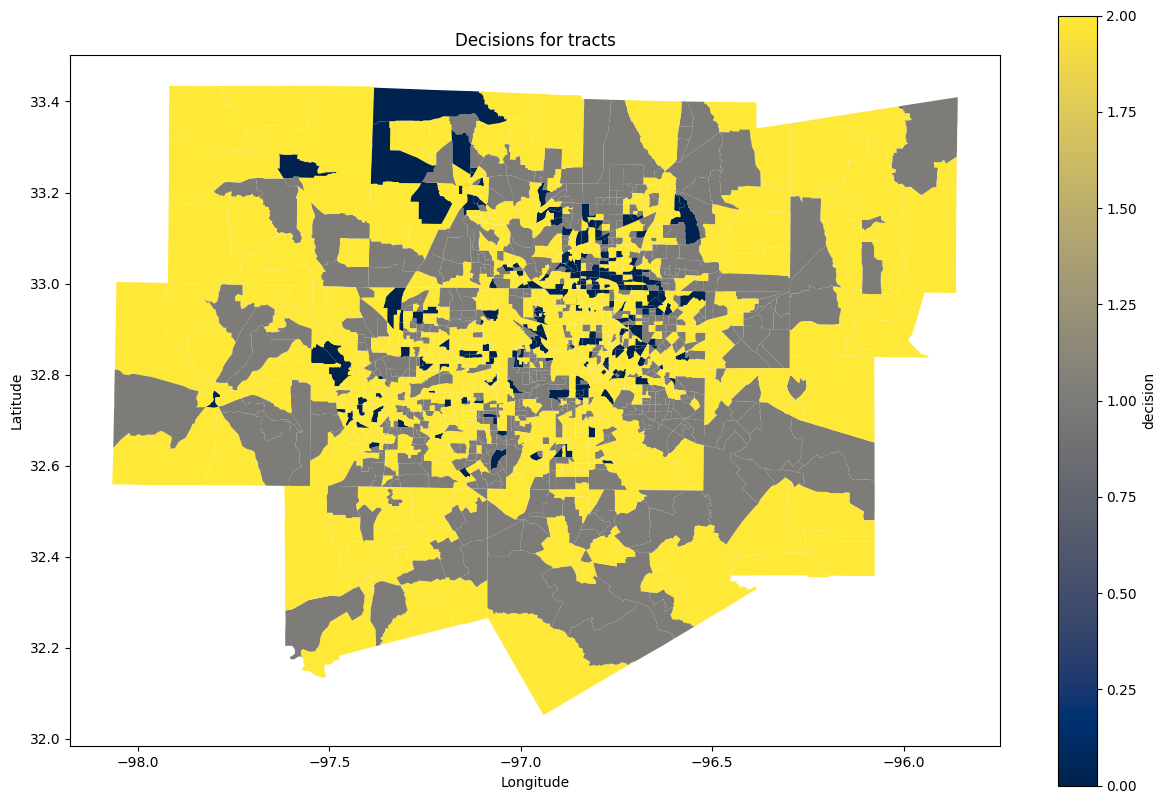

In [43]:
import matplotlib.pyplot as plt

# cax = .plot(ax=ax, column = "decision", cmap='magma',legend=True, legend_kwds={'decision': "0: reduce, 1: maintain, 2: increase"})

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the width and height as desired

# Plot the map
vis_df.plot(ax=ax, column='decision', cmap='cividis', legend=True, legend_kwds={'label': "decision"})

# Add title and axis labels
plt.title("Decisions for tracts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the map
plt.savefig("./evaluation_output/Decicion_map.png")
plt.show()

## Final State

In [19]:
%%time
from tqdm import tqdm

tracts_final_states = []

for t_id in range(X_vars.shape[0]):
    tract_id = t_id 
    env = Tract_Env(X_vars.iloc[tract_id,:], X_geo.iloc[tract_id,:], X_vars_all = X_vars, X_geo_all = X_geo)
    state = env.reset()
    
    episode_length = 0
    episode_reward = 0    
    for i in range(100):
        episode_length += 1
        action = agent.get_action(torch.from_numpy(state)).item()
        next_state, reward, terminated, info = env.step(action)
        done = terminated 
        # env.render()
        episode_reward += reward
    
        state = next_state
        if done is True:
            print(f"episode reward={episode_reward}, episode length{episode_length}")
            state = env.reset()
            episode_length = 0
            episode_reward = 0
    
    tracts_final_states.append(state)

episode reward=100, episode length100
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode reward=5, episode length1
episode re

In [20]:
# pca
# def EVCSEI(n_EVCS, X_vars_tract, pca=pca, alpha = 15):
from reward import EVCSEI

E_scores = []
for i in range(len(tracts_final_states)):
    EVCS_cnt = tracts_final_states[i][0]
    vars = tracts_final_states[i][1:]
    E_score = EVCSEI(EVCS_cnt, vars)
    E_scores.append(E_score)
    
E_scores

[-2988.5103319672803,
 -5396.256389468219,
 -4072.1586393247826,
 -11533.771170033224,
 -13726.023936736485,
 -9353.212755253775,
 -7904.292515659783,
 -12167.15166308142,
 -19581.220598403106,
 -13564.064519176649,
 -12026.239853156747,
 -3820.4756986225666,
 -12951.693040469181,
 -17265.027749849265,
 -26544.029106417307,
 -10762.234764794377,
 -12110.491817766495,
 -20388.083620006168,
 -9184.597165682679,
 -6324.205449701324,
 -14915.195851401162,
 -7984.2141782198605,
 -20558.177656683958,
 -3633.6124564645993,
 -10377.690453327632,
 -18153.881065580517,
 -7792.374734540707,
 -6290.4767370702675,
 -38611.66872295901,
 -18865.511579309954,
 -22188.782600512124,
 -7981.760772669546,
 -12095.655091625244,
 -13448.095937339678,
 -19993.022290572895,
 -8419.38761664268,
 -15047.62964278593,
 -8329.681966222926,
 -7836.404817989813,
 -8023.76781705837,
 -13263.672125782254,
 -13316.77049287863,
 -11013.102121610007,
 -19414.566822231616,
 -12466.517121945415,
 -10543.622858679119,
 -129

### save pkl file

In [21]:
import pickle

with open("./evaluation_output/tracts_final_states.pkl", "wb") as file:
    pickle.dump(tracts_final_states, file)

with open("./evaluation_output/e_scores.pkl", "wb") as file:
    pickle.dump(E_scores, file)

In [28]:
with open("./evaluation_output/tracts_final_states.pkl", "rb") as file:
    tracts_final_states = pickle.load( file)

with open("./evaluation_output/e_scores.pkl", "rb") as file:
    E_scores = pickle.load( file)

In [30]:
len(tracts_final_states), tracts_final_states[0:5], len(E_scores), E_scores[0:5]

(1718,
 [array([   0, 2787,  476,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,   79,   65,   65,    0,    0,  281,  353,
           62,    0,   15]),
  array([   1, 2472,  371,    0,    0,    0,    0,    0,    0,   50,    0,
            0,    0,    0,    0,   74,  253,  163,   90,   24,  230,  206,
          176,    0,   40]),
  array([   0, 3846,  649,    0,    0,    0,    0,    0,    0,   33,    0,
            0,    0,    0,    0,   13,  187,  122,   65,   38,  134,  411,
          106,    0,   66]),
  array([   1, 4742,  549,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,  116,  670,  381,  289,   50,  333,  399,
          302,    0,   86]),
  array([   0, 3838,  955,    0,    0,    0,    0,    0,    0,   54,    0,
            0,    0,    0,    0,  122,  579,  464,  115,   35,  281,  165,
         1063,    0,    0])],
 1718,
 [-2988.5103319672803,
  -5396.256389468219,
  -4072.1586393247826,
  -11533.771170033224,

### visualize final state

In [24]:
import pandas as pd
import geopandas as gpd
df_E_scores = pd.DataFrame( {"equity score": E_scores} )
vis_df_e_s = pd.concat([X_geo, X_vars, df_E_scores], axis = 1)
vis_df_e_s = gpd.GeoDataFrame(vis_df_e_s, geometry=vis_df_e_s.geometry)

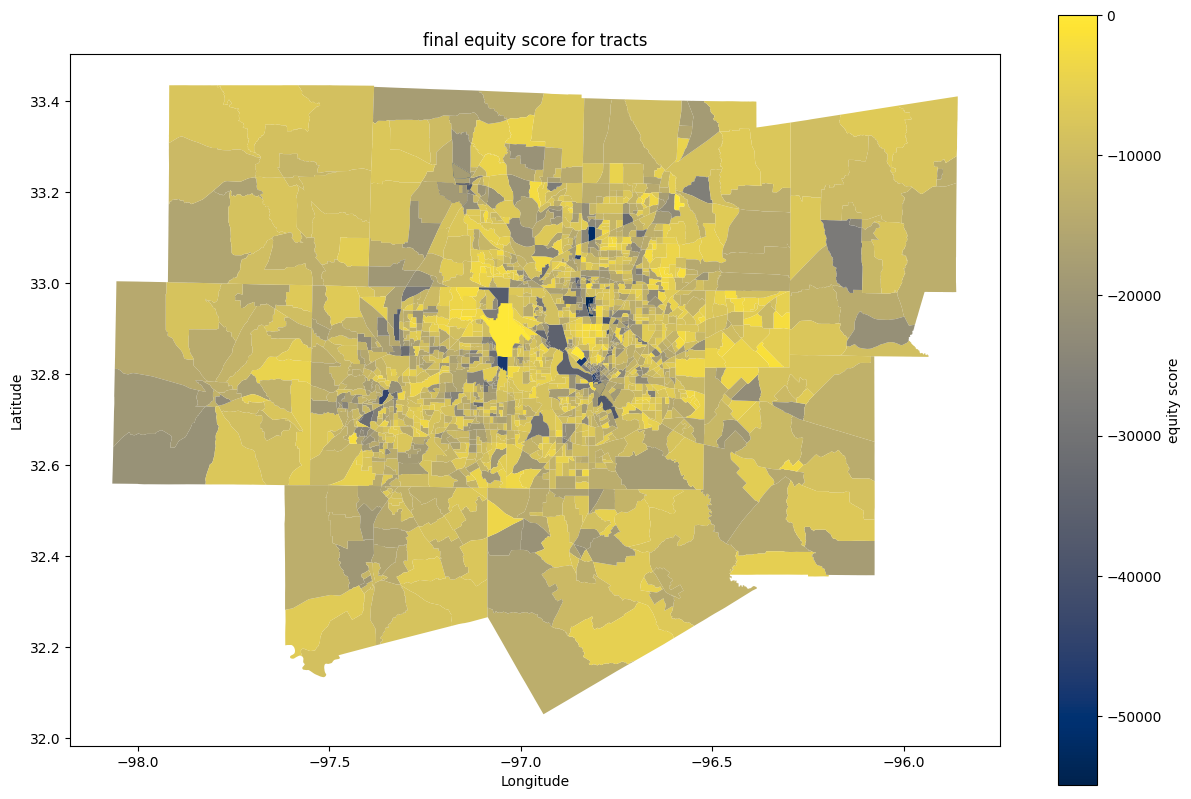

In [25]:
import matplotlib.pyplot as plt

# cax = .plot(ax=ax, column = "decision", cmap='magma',legend=True, legend_kwds={'decision': "0: reduce, 1: maintain, 2: increase"})

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the width and height as desired

# Plot the map
vis_df_e_s.plot(ax=ax, column='equity score', cmap='cividis', legend=True, legend_kwds={'label': "equity score"})

# Add title and axis labels
plt.title("final equity score for tracts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the map
plt.savefig("./evaluation_output/equity_map.png")
plt.show()